## **FAKE NEWS DETECTION MODEL**
A fake news detection model is a machine learning model that is trained to identify and classify news
articles or other forms of content as either real or fake. Fake news refers to deliberately misleading, false or biased information presented as news or journalism, with the aim of manipulating public opinion or
spreading propaganda.

## 0 for real news
## 1 for fake news

This code imports the following libraries:
1. **numpy** and **pandas** for data manipulation
2. **re** for regular expression operations use for searching text in a document
3. **matplotlib** for data visualization
4. **WordCloud** for creating word clouds
5. **stopwords** and **PorterStemmer** from nltk for text preprocessing
6. **TfidfVectorizer**, **CountVectorizer** and **TfidfTransformer** from **sklearn** for feature extraction
7. **train_test_split** from **sklearn** for splitting data into training and testing sets
8. **LogisticRegression** and **DecisionTreeClassifier** from **sklearn** for model training
9. **accuracy_score** from **sklearn.metrics** for model evaluation
10. **GridSearchCV**, **StratifiedKFold**, **cross_val_score** and **learning_curve** from **sklearn.model_selection** for hyperparameter tuning and cross-validation.

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

ModuleNotFoundError: No module named 'sklearn'

The **stopwords** corpus contains a list of commonly occurring words in a language (such as "the", "and", "of", etc.) that are usually removed from text data during text preprocessing because they do not carry much useful information for text analysis.

This code imports the **stopwords** corpus from nltk and creates a set of English stop words, which you can use to remove stop words from your text data.

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

The **pd.read_csv()** function reads the CSV file at the given path and returns a DataFrame that contains the data. The **drive.mount()** function mounts your Google Drive on Google Colab so that you can access your files and directories on your Google Drive.

After running this code, you can access the **news_dataset** DataFrame to explore and preprocess the data.

https://www.kaggle.com/datasets/jruvika/fake-news-detection

In [10]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/train.csv')

In [11]:
news_dataset.shape

(4009, 4)

In [12]:
#from google.colab import drive
#drive.mount('/content/drive')

The **head()** method of a DataFrame returns the first n rows (5 by default) of the DataFrame. By default, it returns the first 5 rows of the DataFrame, but you can pass an integer value to the method to return the first n rows.

This code will print the first 5 rows of the **news_dataset** DataFrame to the console so that you can get a sense of the structure of the data.

In [13]:
# print the first 5 rows of the dataframe
news_dataset.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


The **hist()** method of a pandas Series or DataFrame creates a **histogram** of the values in the Series or DataFrame. In this case, we are creating a histogram of the **Label** column in the **news_dataset** DataFrame.

This code will plot a histogram of the **Label** column, which contains the labels for the news articles. The histogram will show the distribution of the labels in the dataset, which can help you understand the balance of the classes and identify any class imbalance issues.

<Axes: >

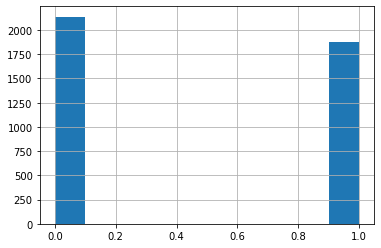

In [14]:
news_dataset["Label"].hist()

The code **news_dataset.isnull().sum()** is used to count the number of missing values in a dataset named **news_dataset**.

The **isnull()** method is used to create a Boolean mask of the same shape as the dataset, where **True** values represent missing values, and **False** values represent non-missing values.

The **sum()** method is then used to sum up the number of **True** values in each column of the Boolean mask, which corresponds to the number of missing values in each column of the dataset.

So the output of this code will be a series that lists the number of missing values for each column in **news_dataset**.

In [15]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

The code **news_dataset = news_dataset.fillna('')** is used to replace all missing values in the dataset named **news_dataset** with empty strings **('')**.

The **fillna()** method is used to fill the missing values in a dataset with a specified value. In this case, we are filling the missing values with an empty string, which is represented by **''**.

After executing this code, all the missing values in **news_dataset** will be replaced with empty strings. This is often done to ensure that the dataset has no missing values before performing further analysis or modeling.

In [16]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

This code seems to merge the body of a news article and its **headline** into a new column called "**content**" in a pandas DataFrame called "**news_dataset**".

Assuming that the columns "**Body**" and "**Headline**" contain the text of the news article's body and headline respectively, this code concatenates these two strings with a space between them using the **"+"** operator and assigns the result to a new column "**content**" in the same DataFrame.

This could be useful for analyzing the text of news articles as a single unit, rather than separately examining the headline and body. However, it's important to note that this merging of text may not always be appropriate, especially if the headline and body convey different meanings or the headline is not a concise summary of the article's main **content**.

In [17]:
# merging the author name and news title
news_dataset['content'] = news_dataset['Body']+' '+news_dataset['Headline']

The "**content**" column contain the merged text of each news article's body and headline, separated by a space.

In [1]:
print(news_dataset['content'])

NameError: name 'news_dataset' is not defined

This code separates the data and label in a pandas DataFrame called "**news_dataset**". Assuming that the DataFrame has a column called "**Label**" that contains the labels for each news article (e.g., 0 or 1 to indicate negative or positive sentiment), this code creates two new variables:

**X**: This variable contains all the columns in the "**news_dataset**" DataFrame except for the "**Label**" column. This variable represents the data (i.e., the features or independent variables) that will be used to predict the labels.

**Y**: This variable contains only the "**Label**" column from the "**news_dataset**" DataFrame. This variable represents the label (i.e., the dependent variable) that will be predicted based on the data in X.

By separating the data and label in this way, we can train a machine learning model to predict the labels based on the data, and then use the model to make predictions on new, unseen data.



In [19]:
# separating the data & label
X = news_dataset.drop(columns='Label', axis=1)
Y = news_dataset['Label']

**print(X)** will print the values of **X**, which contains all the columns in the "**news_dataset**" DataFrame except for the "**Label**" column. This variable represents the data (i.e., the features or independent variables) that will be used to predict the labels.

**print(Y)** will print the values of **Y**, which contains only the "**Label**" column from the "**news_dataset**" DataFrame. This variable represents the label (i.e., the dependent variable) that will be predicted based on the data in X.

The output of these print statements will depend on the contents of the "**news_dataset**" DataFrame. **X** will contain all the columns except for "**Label**", while **Y** will contain only the "**Label**" column. If the DataFrame has many columns or rows, only a subset of the values will be printed to the console.

In [20]:
print(X)
print(Y)

                                                   URLs  \
0     http://www.bbc.com/news/world-us-canada-414191...   
1     https://www.reuters.com/article/us-filmfestiva...   
2     https://www.nytimes.com/2017/10/09/us/politics...   
3     https://www.reuters.com/article/us-mexico-oil-...   
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...   
...                                                 ...   
4004  http://beforeitsnews.com/sports/2017/09/trends...   
4005  http://beforeitsnews.com/u-s-politics/2017/10/...   
4006  https://www.activistpost.com/2017/09/ron-paul-...   
4007  https://www.reuters.com/article/us-china-pharm...   
4008  http://beforeitsnews.com/u-s-politics/2017/10/...   

                                               Headline  \
0            Four ways Bob Corker skewered Donald Trump   
1     Linklater's war veteran comedy speaks to moder...   
2     Trump’s Fight With Corker Jeopardizes His Legi...   
3     Egypt's Cheiron wins tie-up with Pemex for Mex...

**PorterStemmer()** is a class from the Natural Language Toolkit (NLTK) library in Python that is used for stemming words. Stemming is the process of reducing a word to its base or root form.
The stemmed_word variable will contain the stemmed form of the word "jumping", which is "jump".

**Stemming** can be useful in natural language processing (NLP) tasks such as text classification or information retrieval, where words with the same root are treated as equivalent. However, stemming can also result in some loss of information, as different words may be stemmed to the same root, even if they have different meanings.

In [21]:
port_stem = PorterStemmer()

Here's a breakdown of what the code does:

**stemmed_content** = **re.sub('[^a-zA-Z]',' ',content)**: This line uses regular expressions to remove any non-alphabetic characters from the text and replaces them with a space. This helps to clean up the text and remove any unwanted characters.

**stemmed_content** = **stemmed_content.lower():** This line converts all the alphabetic characters in the text to lowercase. This helps to standardize the text and avoid treating words with different capitalization as different words.

**stemmed_content** = **stemmed_content.split()**: This line splits the text into a list of individual words, using whitespace as the delimiter.

**stemmed_content** = **[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]**: This line uses a list comprehension to iterate over each word in the list of stemmed words. For each word, it applies the stem() method of the PorterStemmer class to obtain its stem, and checks if the resulting stem is in the NLTK list of English stopwords (i.e., common words that are often removed from text during NLP tasks). If the word is not a stopword, its stem is added to a new list of stemmed words.

**stemmed_content** = **' '.join(stemmed_content)**: Finally, this line joins the list of stemmed words back together into a single string, separated by whitespace.

The resulting output of the **stemming** function is a stemmed version of the original text, with non-alphabetic characters removed, words converted to lowercase, and stopwords and stemming applied.

In [22]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

**news_dataset**['content']: This selects the 'content' column of the news_dataset DataFrame.

**.apply(stemming)** : This applies the stemming function to each element of the 'content' column of the DataFrame. The apply() method is used to apply a function to each element of a Pandas DataFrame or Series.

**news_dataset** ['content'] = ...: This assigns the resulting output of the apply() method back to the 'content' column of the news_dataset DataFrame. This updates the values of the 'content' column to be the stemmed version of the original text.

In [23]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

The output should be a Pandas Series containing the stemmed version of the text in the '**content**' column of the DataFrame. Each element of the Series should be a string containing the stemmed words of the original text, with non-alphabetic characters removed, words converted to lowercase, and stopwords and stemming applied.

In [24]:
print(news_dataset['content'])

0       imag copyright getti imag sunday morn donald t...
1       london reuter last flag fli comedi drama vietn...
2       feud broke public view last week mr corker sai...
3       mexico citi reuter egypt cheiron hold limit ri...
4       countri singer jason aldean perform la vega sh...
                              ...                        
4004    trend watch reader think stori fact add two ce...
4005    trump jr soon give minut speech reader think s...
4006                       ron paul trump anarch altright
4007    shanghai reuter china said plan accept data ov...
4008    vice presid mike penc leav nfl game anti ameri...
Name: content, Length: 4009, dtype: object


**X = news_dataset['content'].values**: This selects the 'content' column of the news_dataset DataFrame and gets its values as a numpy array. This assigns the resulting array to the variable X.

**Y = news_dataset['Label'].values**: This selects the 'Label' column of the news_dataset DataFrame and gets its values as a numpy array. This assigns the resulting array to the variable Y.

In [25]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['Label'].values

The output should be a one-dimensional numpy array where each element is a string representing the preprocessed text content of a news article. These strings should contain only lowercase alphabetic characters and whitespace, with stopwords and stemming applied.

In [26]:
print(X)

['imag copyright getti imag sunday morn donald trump went twitter tirad member parti exactli huge news far first time presid turn rhetor cannon rank time howev attack particularli bite person essenti call tennesse senat bob corker chair power senat foreign relat committe coward run elect said mr corker beg presid endors refus give wrongli claim mr corker support iranian nuclear agreement polit accomplish unlik colleagu mr corker free worri immedi polit futur hold tongu skip twitter post senbobcork shame white hous becom adult day care center someon obvious miss shift morn senat bob corker senbobcork octob report end though spoke new york time realli let presid four choic quot tennesse senat interview time particularli damn know presid tweet thing true know everyon know realli sugarcoat one mr corker flat say presid liar everyon know senat particular challeng mr trump insist unsuccess plead endors accus much broader mr corker presid use someth akin alli tennessean mr trump short list vi

The output should be a one-dimensional numpy array where each element is a binary label (0 or 1) indicating whether the corresponding news article is categorized as "real" or "fake". A label of 0 indicates the article is "real", while a label of 1 indicates the article is "fake".

In [27]:
print(Y)

[1 1 1 ... 0 1 0]


In [28]:
Y.shape

(4009,)

**vectorizer = TfidfVectorizer()**: This creates an instance of the TfidfVectorizer class, which is used to convert text data into a numerical format using the term frequency-inverse document frequency (TF-IDF) algorithm.

**vectorizer.fit(X)**: This fits the vectorizer to the preprocessed text data in X, which calculates the IDF values for each term in the text corpus.

**X = vectorizer.transform(X)**: This uses the fitted vectorizer to transform the preprocessed text data in X into a sparse matrix of TF-IDF feature vectors, where each row represents a news article and each column represents a term in the text corpus.

In [29]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
vectorizer.fit(X)

X = vectorizer.transform(X)

In [30]:
print(X)

  (0, 30031)	0.015680397618627634
  (0, 29953)	0.010205176272625608
  (0, 29773)	0.04098318204746603
  (0, 29715)	0.023177908237418374
  (0, 29688)	0.026120109815599504
  (0, 29552)	0.027496999544427546
  (0, 29407)	0.09094240671181658
  (0, 29318)	0.021740511563622573
  (0, 29303)	0.017888880367675976
  (0, 29172)	0.027152802971970653
  (0, 29083)	0.018854122471823127
  (0, 28936)	0.021528861551233555
  (0, 28714)	0.024852844046508525
  (0, 28664)	0.024376036729831387
  (0, 28615)	0.034986262350623264
  (0, 28552)	0.029447453949221415
  (0, 28399)	0.024071976802380345
  (0, 28313)	0.019624763468957623
  (0, 28248)	0.03637821914649184
  (0, 28202)	0.03670279994265406
  (0, 28193)	0.03822616863854488
  (0, 28165)	0.03741355361583914
  (0, 28117)	0.023208854460999358
  (0, 28094)	0.01456188344225188
  (0, 28015)	0.043652153104061196
  :	:
  (4008, 6499)	0.026829097157780337
  (4008, 6310)	0.04258610046437832
  (4008, 6197)	0.020271873159459195
  (4008, 5825)	0.03724673566028884
  (4008, 

**train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)**: This function splits the data and labels into training and testing sets, with 20% of the data allocated to the test set. The stratify parameter is set to Y, which ensures that the class balance is maintained in both the training and testing sets. The random_state parameter is set to 2 to ensure that the split is reproducible.

**X_train, X_test, Y_train, Y_test**: This unpacks the output of the train_test_split function into four variables: X_train and Y_train represent the training set data and labels, while X_test and Y_test represent the test set data and labels.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

**Classifier** -
 In machine learning, classification is a predictive modeling problem where the class label is anticipated for a specific example of input data. Classification tries to find the decision boundary, which divides the dataset into different classes.

**Logistic regression** is a machine learning algorithm that is commonly used for binary classification problems, where the goal is to predict a binary label (e.g., 0 or 1) based on a set of input features.

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, Y_train)

LogisticRegression()

In [34]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9903336451512317


In [36]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9613466334164589


In [38]:
X_new = X_test[89]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [39]:
print(Y_test[75])

0


**Decision trees** are a machine learning algorithm that can be used for both regression and classification problems. They work by recursively partitioning the feature space into smaller and smaller subsets based on the values of the input features, until the subsets are homogeneous with respect to the output variable.

In [40]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, Y_train)
dt_clf.score(X_test, Y_test)

0.8965087281795511

**Random Forest Classifier** is a popular ensemble learning method that combines multiple decision trees to create a more robust model. It works by constructing multiple decision trees using randomly sampled subsets of the training data and features, and then aggregating the predictions of the individual trees to make a final prediction.

In [41]:
#Perform Classification Using Random Forest Classifier
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, Y_train)
rf_clf.score(X_test, Y_test)

0.9675810473815462

**Gradient Boosting** is a functional gradient algorithm that repeatedly selects a function that leads in the direction of a weak hypothesis or negative gradient so that it can minimize a loss function.

We use **gradient boosting** to solve classification and regression problems. It is a sequential ensemble learning technique where the performance of the model improves over iterations. This method creates the model in a stage-wise fashion.

In [42]:
#Perform Classification Using Gradient Boosting Classifier
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)
gb_clf.score(X_test, Y_test)

0.972568578553616

In [43]:
# Let's  tune this Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,Y_train)
gb_clf.score(X_test, Y_test)

0.9600997506234414

**Naive Bayes Classifier** is a simple yet effective probabilistic machine learning algorithm that is commonly used for classification tasks. It is based on the Bayes theorem and assumes that all input features are independent of each other, hence the name "naive".

In [44]:
#Classification Using Navie Bayes Classifer
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train,Y_train)
nb_clf.score(X_test, Y_test)

0.9276807980049875

**K-Nearest Neighbor (K-NN)** is a popular supervised learning algorithm that can be used for both regression and classification tasks. It works by finding the k nearest neighbors to a given input sample in the training data and using their labels to make a prediction for the input sample.

In [45]:
#K-nearest Neighbour Classifer
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,Y_train)
knn_clf.score(X_test, Y_test)

0.9164588528678305

A **support vector machine** (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems.

After giving SVM model sets of labelled training data for each category, they're able to categorize new text.

In [46]:
#SVM
from sklearn.svm import SVC
sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(X_train, Y_train)
sv_clf.score(X_test, Y_test)

0.9850374064837906

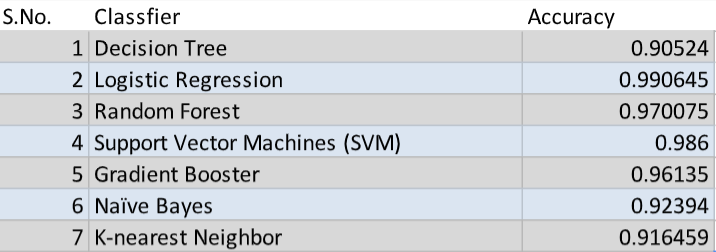

# **Confusion Matrix**
A confusion matrix is a table used to evaluate the performance of a classifier by comparing its predictions to the true labels of the data. The rows of the matrix represent the actual (true) labels, while the columns represent the predicted labels. The diagonal elements of the matrix represent the number of correctly classified instances, while the off-diagonal elements represent the misclassified instances.

**True Positive:** Actually positive (ground truth), predicted as positive (correctly classified)

**True Negative:** Actually negative (ground truth), predicted as negative (correctly classified)

**False Positive:** Actually negative (ground truth), predicted as positive (misclassified)

**False Negative:** Actually positive (ground truth), predicted as negative (misclassified)

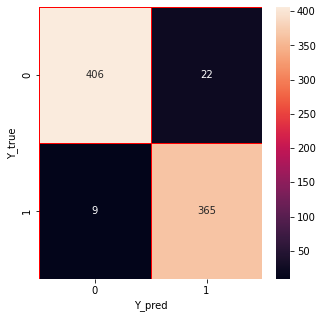

Accuracy Logistic Regression : 0.961
Precision Logistic Regression : 0.961
Recall Logistic Regression : 0.961
f1-score Logistic Regression : 0.961


In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Logistic Regression
Y_pred = model.predict(X_test)
Y_true = Y_test
cm = confusion_matrix(Y_true, Y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

predict = model.predict(X_test)
accuracy = accuracy_score(predict, Y_test)
precision = precision_score(predict, Y_test, average = 'micro')
recall = recall_score(predict, Y_test, average = 'micro')
f1 = f1_score(predict, Y_test, average = 'micro')
print('Accuracy Logistic Regression : %.3f' %accuracy) 
print('Precision Logistic Regression : %.3f' %precision)
print('Recall Logistic Regression : %.3f' %recall)
print('f1-score Logistic Regression : %.3f'%f1)   

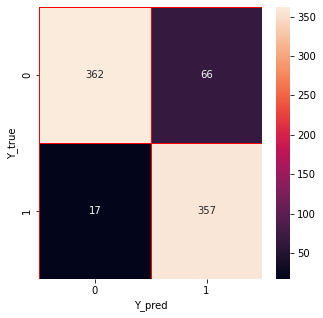

Accuracy Decision Tree : 0.897
Precision Decision Tree : 0.897
Recall Decision Tree : 0.897
f1-score Decision Tree : 0.897


In [48]:
#Decision Tree
Y_pred = dt_clf.predict(X_test)
Y_true = Y_test
cm = confusion_matrix(Y_true, Y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

predict=dt_clf.predict(X_test)
accuracy = accuracy_score(predict, Y_test)
precision = precision_score(predict, Y_test, average = 'micro')
recall = recall_score(predict, Y_test, average = 'micro')
f1 = f1_score(predict, Y_test, average = 'micro')
print('Accuracy Decision Tree : %.3f' %accuracy) 
print('Precision Decision Tree : %.3f' %precision)
print('Recall Decision Tree : %.3f' %recall)
print('f1-score Decision Tree : %.3f'%f1)   



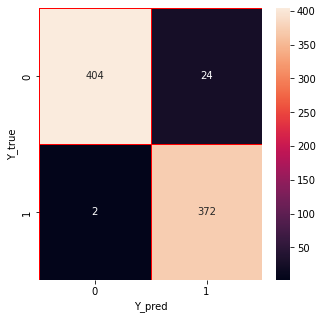

Accuracy Random Forest : 0.968
Precision Random Forest : 0.968
Recall Random Forest : 0.968
f1-score Random Forest : 0.968


In [49]:
#Random Forest
Y_pred = rf_clf.predict(X_test)
Y_true = Y_test
cm = confusion_matrix(Y_true, Y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

predict=rf_clf.predict(X_test)
accuracy = accuracy_score(predict, Y_test)
precision = precision_score(predict, Y_test, average = 'micro')
recall = recall_score(predict, Y_test, average = 'micro')
f1 = f1_score(predict, Y_test, average = 'micro')
print('Accuracy Random Forest : %.3f' %accuracy) 
print('Precision Random Forest : %.3f' %precision)
print('Recall Random Forest : %.3f' %recall)
print('f1-score Random Forest : %.3f'%f1)   

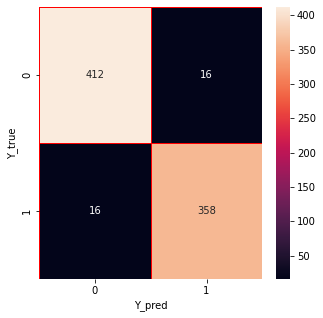

Accuracy Gradiant-Booster : 0.960
Precision Gradiant-Booster : 0.960
Recall Gradiant-Booster : 0.960
f1-score Gradiant-Booster : 0.960


In [50]:
#Gradiant-Booster
Y_pred = gb_clf.predict(X_test)
Y_true = Y_test
cm = confusion_matrix(Y_true, Y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

predict=gb_clf.predict(X_test)
accuracy = accuracy_score(predict, Y_test)
precision = precision_score(predict, Y_test, average = 'micro')
recall = recall_score(predict, Y_test, average = 'micro')
f1 = f1_score(predict, Y_test, average = 'micro')
print('Accuracy Gradiant-Booster : %.3f' %accuracy) 
print('Precision Gradiant-Booster : %.3f' %precision)
print('Recall Gradiant-Booster : %.3f' %recall)
print('f1-score Gradiant-Booster : %.3f'%f1)   

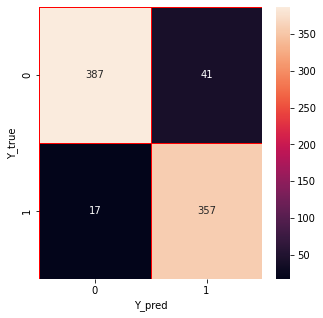

Accuracy Naive Bayes : 0.928
Precision Naive Bayes : 0.928
Recall Naive Bayes : 0.928
f1-score Naive Bayes : 0.928


In [51]:
# Naive Bayes
Y_pred = nb_clf.predict(X_test)
Y_true = Y_test
cm = confusion_matrix(Y_true, Y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

predict=nb_clf.predict(X_test)
accuracy = accuracy_score(predict, Y_test)
precision = precision_score(predict, Y_test, average = 'micro')
recall = recall_score(predict, Y_test, average = 'micro')
f1 = f1_score(predict, Y_test, average = 'micro')
print('Accuracy Naive Bayes : %.3f' %accuracy) 
print('Precision Naive Bayes : %.3f' %precision)
print('Recall Naive Bayes : %.3f' %recall)
print('f1-score Naive Bayes : %.3f'%f1)   

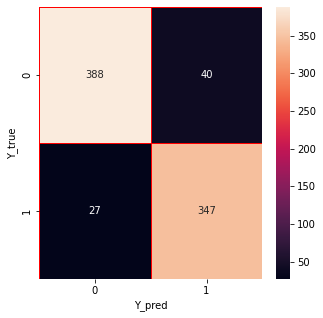

Accuracy K-Nearest Neighbor : 0.916
Precision K-Nearest Neighbor : 0.916
Recall K-Nearest Neighbor : 0.916
f1-score K-Nearest Neighbor : 0.916


In [52]:
#K-Nearest Neighbor
Y_pred = knn_clf.predict(X_test)
Y_true = Y_test
cm = confusion_matrix(Y_true, Y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

predict=knn_clf.predict(X_test)
accuracy = accuracy_score(predict, Y_test)
precision = precision_score(predict, Y_test, average = 'micro')
recall = recall_score(predict, Y_test, average = 'micro')
f1 = f1_score(predict, Y_test, average = 'micro')
print('Accuracy K-Nearest Neighbor : %.3f' %accuracy) 
print('Precision K-Nearest Neighbor : %.3f' %precision)
print('Recall K-Nearest Neighbor : %.3f' %recall)
print('f1-score K-Nearest Neighbor : %.3f'%f1)   

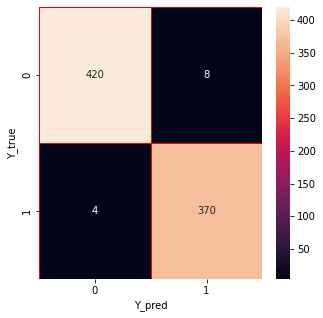

Accuracy SVM : 0.985
Precision SVM : 0.985
Recall SVM : 0.985
f1-score SVM : 0.985


In [53]:
#Support Vector Machine(SVM)
Y_pred = sv_clf.predict(X_test)
Y_true = Y_test
cm = confusion_matrix(Y_true, Y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

predict=sv_clf.predict(X_test)
accuracy = accuracy_score(predict, Y_test)
precision = precision_score(predict, Y_test, average = 'micro')
recall = recall_score(predict, Y_test, average = 'micro')
f1 = f1_score(predict, Y_test, average = 'micro')
print('Accuracy SVM : %.3f' %accuracy) 
print('Precision SVM : %.3f' %precision)
print('Recall SVM : %.3f' %recall)
print('f1-score SVM : %.3f'%f1)  


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [55]:
#vector = TfidfVectorizer(stop_words='english', max_df=0.7)

In [56]:
#save model
import pickle
filename = 'finilized-model.pkl'
pickle.dump(model, open(filename, 'wb'))
#pickle.dump(vectorizer, open(filename, 'wb'))

In [57]:
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))